<a href="https://colab.research.google.com/github/vicentegm93/MAIR---Algoritmos-de-Optimizacion---2019/blob/master/Seminario_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Vicente González  <br>
Url: https://colab.research.google.com/github/vicentegm93/MAIR---Algoritmos-de-Optimizacion---2019/blob/master/Seminario_Algoritmos.ipynb<br>
Problema:
> 1. Sesiones de doblaje <br>


Descripción del problema:

Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de
doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio
de grabación independientemente del número de tomas que se graben. No es posible grabar
más de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que se gasto
por los servicios de los actores de doblaje sea el menor posible.

(*) La respuesta es obligatoria





                                        

In [0]:
import numpy as np
from numpy import genfromtxt
import random
import pandas as pd
import math

parametros=np.array([[ 1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 3.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 4.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.],
       [ 5.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 6.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 7.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 8.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 9.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [10.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
       [11.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
       [12.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [13.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [14.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [15.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [16.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [17.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [18.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [19.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [20.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [21.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.],
       [22.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [23.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [24.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [25.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [26.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
       [27.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [28.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [29.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.],
       [30.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

1.(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




Respuesta

Suponiendo que vamos a distribuir las tomas en a lo más de los 5 días, ya que de otra forma la cantidad de posibilidades sería infinitas, el número de posibilidades sería.

5^30   --- maxdías^(número de tomas)

2.Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Respuesta

La estructura de datos seleccionada para dar solución al problema es una matriz de dos dimensiones.    
Esta muestra los días en que las tomas seran grabadas, es decir, Zjk: 1 si se graba la toma j el dia k, 0 si no.    
Obtenida esta matriz podemos saber que tomas se grabaran cada día. Sabiendo que toma se grabara cadad día sabremos que actores necesitarán ir, ya que 
tenemos la matriz "parametros" la que tiene como información que actores necesita cada toma.    
Haciendo el cruze de estas dos tablas sabremos que días tendrán que asistir cada uno de los actores.

3.## Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta

La función objetivo es MINIMIZAR la cantidad de dias que los actores deben asistir a grabar.   
Antes de haber subido la plantilla intente modelar el problema, definiendo su f.o sus variables y restricciones, lo dejo a continuación....

Parámetros:
- Aij : 1 si el actor i participa en la toma j, 0 si no 

Variables:

- Zjk: 1 si se graba la toma j el dia k, 0 si no
- Yik: 1 si el actor i asiste el día k a grabar

Conjutos:

- I: conjunto de actores
- J: conjunto de tomas
- K: conjunto de días

Función objetivo:

- Minimizar sumi sumk  Yik

Restricciones:

- sumk Zjk= 1 para todas las tomas pertenecientes J    ---- las tomas pueden ser tomadas un solo día

- sumj Zjk <= 6 para todos los días pertenecientes K ---- se pueden tomar máximo 6 tomas por día

- sum  Zjk*Aij <= Yik  para todos los actores I,  para todos los días K, para todas las tomas J ----- si se graba una toma un día entonces los actores de esa toma deben ir ese día

- Zjk e (0,1)  para todo las tomas perteneciente J y para todos los dias pertenecientes a K  ---- restricción de dominio

4.Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

5.Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

El algoritmo sería de orden exponencial, con n igual a la cantidad de días como máximo que podríamos grabar las tomas

6.(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

Encontré un paper de una metaheruistica poblacional que se basa en como cazan los lobos grises (dejo link de paper en referencia).    
Este paper esta basado en resolver el problema de la mochila, sin embargo, realice las adaptaciones para este problema.    
Realizaré una breve explicación de este paper y también a través del código iré comentando.    
Los lobos grises cazan en manada, manada que posee una jerarquía. Existen 3 lobos líderes (a,b,g) que son los que más influyen en la caza de la presa, el resto simplemente ayuda en la búsqueda.    
En la metaheurística esto se ve reflejado en que cada lobo representa una posible solución, así se puede definir que los lobos líderes son los lobos que poseen la mejor F.O, quienes influenciarán de mayor forma en la solución.    
Para tomar la decision de donde esta la presa, se realiza una combinación entre las posiciones (soluciones) de los 3 lobos líderes mediante la suma de cada posición de los lobos.    
Estas posiciones están ponderadas por su jerarquía (calidad de la solución).
Evidentemente la suma de las soluciones darán soluciones fuera del espacio de solución 0,1. Es por ello que se debe realizar una binarización de las soluciones (no analizeen profundidad la técnica, ya que no me dio el tiempo. Preferí centrarme en entender la metaheurística).    
Si bien se cumple con soluciones dentro del espacio 0,1, aún así se generan soluciones infactibles. Para tratar las soluciones infactibles se prefierío repararlas, ya que el descarte así que se analizarán muy pocas soluciones, debido a que era muy difícil cumplir con las restricciones.    

A continuación dejo el código del problema el cual lo iré comentando a medida que lo vaya desarrollando.    

El algoritmo es mejor que el de fuerza bruta ya que reduce su complejidad, y converge en general mucho más rápido a soluciones mejores.
En otras palabras con el algoritmo de fuerza bruta podría darse el caso que llevemos inspeccionando 1000 soluciones con una muy mala f.o, en el caso contrario, el algoritmo propuesto, la población va construyendo soluciones mejores a medida que itera. En el peor de los casos se nos podría quedar estancado en un cierto valor y esto debiese suceder en un valor bueno, si es que el algoritmo esta bien diseñado.
Sin embargo, lo más importante es que a través del algoritmo propuesto podemos llegar a alguna solución (independiente de su calidad) mientras que en el de fuerza bruta no debido a la complejidad que tiene.

In [0]:
#El algoritmo requiere comenzar con una solución inicial, al tratarse de una metaheurística poblacional a la función le pasaré como parámetro
# la cantidad de lobos (tamaño de la población). Cabe considerar que el algoritmo fue programado para realizarse con un mínimo de 3 lobos.
def generadorSolucion(lobos):
    soluciones=[]
    for i in range (lobos):
        #genero una matriz la cual guardará que días se grabaran las tomas. 
        solucion=np.zeros((30,5))
        for j in range (5):
            cumple=False
            while cumple==False:
                for i in range (30):
                #Agrego la componente random para decidir si realizar la toma i en el día j. 
                # El valor para aceptarlo lo decidi ya que para valores cercanos al 0.5 el algoritmo tomaba las primeras tomas
                #en los primeros días en la mayoría de las veces por lo que había poca variabilidad "se estancaba facilmente"
                #Además se agrego la condición de que si la toma ya había asignada a un día esta no fuera asignada a otro
                    if random.random()<0.3 and  solucion[i,:].sum()==0:
                        solucion[i][j]=1
                    #Acá verifico que si es que el día tiene 6 tomas asignadas, entonces salga del ciclo for y siga con otro día
                        if solucion[:,j].sum()==6:
                            break
            #Como tome la determinación de bajar la probabilidad de que una toma fuera asignada a un día, para aumentar la
            #variabilidad, ocurre que muchos días quedan asignados con 1 toma lo que obviamente es ineficiente.
            #para evitar a esto fuerzo al algoritmo a que asigne 6 tomas por día
                if solucion[:,j].sum()==6:
                    cumple=True
        #A cada solucion adjunto su costo, ya que en el algoritmo lo utilizaré para ordenar las soluciones de acuerdo a su fo
        solucion=solucion,costo(solucion,parametros)
        soluciones.append(solucion)
        # retorno la lista con lobos
    return soluciones

def costo(solucion,parametros):
    fo=0
    #Verifico las tomas para cada día
    for j in range (5):
        asistencia=np.zeros(10)
        tomas=np.array(np.where(solucion[:,j]==1))
        #sumo la prescencia de los actores en todas las tomas que participan
        for i in range(len(tomas[0])):
            asistencia=asistencia+parametros[int(tomas[0][i])-1,1:]
        #como el costo es el mismo para cada actor para un mismo día independiente de la cantidad de tomas en las que participe, solo 
        #cuento en donde haya estado el actor en al menos una escena y lo sumo al valor de la fo
        c=np.count_nonzero(asistencia)
        fo+=c    
    return fo

def posicionPresa(listaLobos,t,iteraciones):
    #El algoritmo decide la posicion de la presa en base a la posición de los 3 lobos líderes (las 3 soluciones de mayor calidad)
    #para eso ordeno la lista de menor a mayor, ya que se trata de un problema de optimización
    listaLobos.sort(key=lambda x: x[1],reverse=False)
    #La jerarquía de estos lobos se tiene que ver reflejada de alguna forma, para eso se realiza una ponderación entre el valor de las 3 fo
    suma=listaLobos[0][1]+listaLobos[1][1]+listaLobos[2][1]
    wa= listaLobos[0][1]/suma
    wb= listaLobos[1][1]/suma
    wc= listaLobos[2][1]/suma
    #obtenida esta ponderación se multiplica por la solucion de cada uno de los lobos y se suma.
    #Existe una componen matematica que no me detuve a analizar por tiempo.
    posicionPresa= wa*listaLobos[0][0]+wb*listaLobos[1][0]+wc*listaLobos[2][0] + math.exp(-100*(t/iteraciones))
    #retornamos la posición de la presa que no tiene valores reales, por lo que tendrá que ser reparada más adelante
    return posicionPresa

def generadorSoluciondePrueba(posicionPresa,posicionLobo):
   # el algoritmo analiza a cada lobo con respecto a la posicion de la presa, en base a esto se genera una solucion de prueba la cual 
   #será comparada con la posicion de los lideres
    solucionPrueba=np.zeros((30,5))
    j=0
    for i in range(len(posicionPresa)):
        for j in range(len(posicionPresa[0])):
          #mediante esta formula propuesta por el autor del paper se estima un valor y correspondiente en este caso a si agregamos o no la toma j al dia i
            y = posicionPresa[i][j]-random.uniform(-2,2)* abs(posicionPresa[i][j]-posicionLobo[i][j])
            # se añade un valor aleatorio para saber si agregamos o no esta toma a este día
            #además yo agregue dos condiciones para poder cumplir con las restricciones.
            # en resumen, agregaremos si la probabilidad se cumple, si no ha sido agregado esa toma anteriormente y si en ese día no hay más de 5 tomas
            if (random.uniform(0,1) < abs(np.tanh(y)) and solucionPrueba[i,:].sum()==0 and solucionPrueba[:,j].sum()<=5):
                solucionPrueba[i][j]=1
            else:
                solucionPrueba[i][j]=0
    return solucionPrueba 

def reparacion(solucionPrueba):
  #A pesar de que validamos que no se violen las restricciones puede ocurrir que no se hayan añadido las 30 tomas, para ello usaremos esta función de reparación,
  #la cual agregará eventualmente las tomas que no fueron agregadas.
    for j in range(5):
            for i in range(30):
                if solucionPrueba[:,j].sum()<=5:
                    if solucionPrueba[i,:].sum()==0:
                        solucionPrueba[i,j]=1
                else:
                    break
    solucionPrueba=solucionPrueba,costo(solucionPrueba,parametros)
    return solucionPrueba

def resolucion(iteraciones,lobos):
  #el algoritmo al ser población requiere de una población inicial para ser ejecutado. Cabe destacar que fue programado para funcionar con un mínimo de 3 lobos.
    listaLobos=generadorSolucion(lobos)
    for t in range(iteraciones):
        presa=posicionPresa(listaLobos,t,iteraciones) #estimo posición presa
        for k in range (lobos):
            solucionPrueba=generadorSoluciondePrueba(presa,listaLobos[k][0]) #genero solución de prueba
            solucionCorregida=reparacion(solucionPrueba) #reparo la solución de prueba
            if solucionCorregida[1] < listaLobos[k][1]: #si solución de prueba corregida tiene mejor F.O que lobo actual lo reemplazo
                listaLobos[k]=solucionCorregida
                if listaLobos[k][1]<listaLobos[0][1]: #si lobo actual tiene mejor F.O que lobo líder actualizo lobo líder
                    listaLobos[0]=listaLobos[k]
                elif listaLobos[k][1]<listaLobos[1][1]: #si lobo actual tiene mejor F.O que 2do lobo líder actualizo 2do lobo líder
                    listaLobos[1]=listaLobos[k]
                elif listaLobos[k][1]<listaLobos[2][1]:#si lobo actual tiene mejor F.O que 3er lobo líder actualizo 2do lobo líder
                    listaLobos[2]=listaLobos[k]
            elif k!=0 and k!=1 and k!=2: #si el lobo actual no es líder, se actualiza la posición del lobo actual con la solución corregida
                listaLobos[k]=solucionCorregida
    return listaLobos[0]

7.# (*)Calcula la complejidad del algoritmo 

Respuesta

La complejidad del algoritmo es O(n^2)

8.Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

La función generadorSolucion(lobos) descrita anteriormente genera aleatoriamente una población (datos de entrada para el problema)

Aplica el algoritmo al juego de datos generado

Respuesta

In [0]:
s=resolucion(100,8)

In [30]:
#El valor de la F.O es:
s[1]

31

In [31]:
#La solución correspondiente es:
s[0]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

9.Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

Como señale anteriormente me base en un paper titulado
A binary grey wolf optimizer for the multidimensional knaspack problem --- Kaiping Luo, Qiuhong Zhao

Adjunto pseudo código. Si es que lo desea también le puedo enviar el paper.

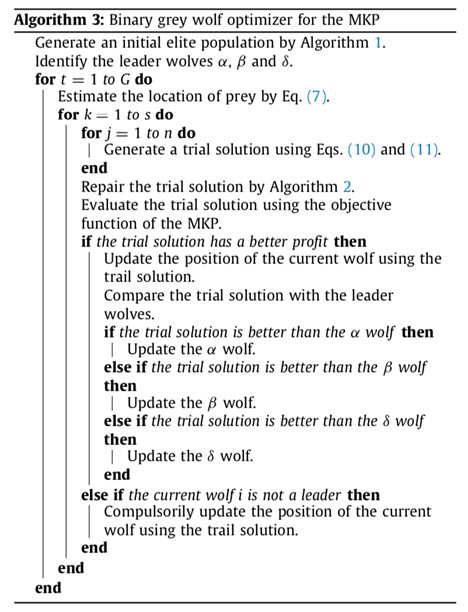

10.Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

Se me ocurren 2 formas de mejorar el algoritmos:    
1- Mejorar la función de reparación.    En este trabajo la realice aleatoriamente, sin embargo, creo que se podría hacer un análisis de como reparar de forma
eficiente soluciones infactibles de tal manera que la probabilidad de encontrar mejores soluciones aumente    
2- Podríamos automatizar el tunning de parámetros. Este algoritmo en particular tiene 2 parámetros principales, las iteraciones y los lobos.
Se me ocurre que en vez de poner un número fijo a la población, podría hacer un algoritmo que vaya aumentando de acuerdo a los resultados,
por ejemplo, si llevo 100 iteraciones obteniendo el mismo resultado podría aumentar la población. De la misma forma que si el algoritmo esta mejorando constantemente
los resultados no deberiamos agregar más elementos a la población, así podríamos hacer más eficiente el algoritmo.